# 종이 스캔본 전처리 및 글자 추출

### 라이브러리

In [1]:
import cv2
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt

### 이미지 불러오기

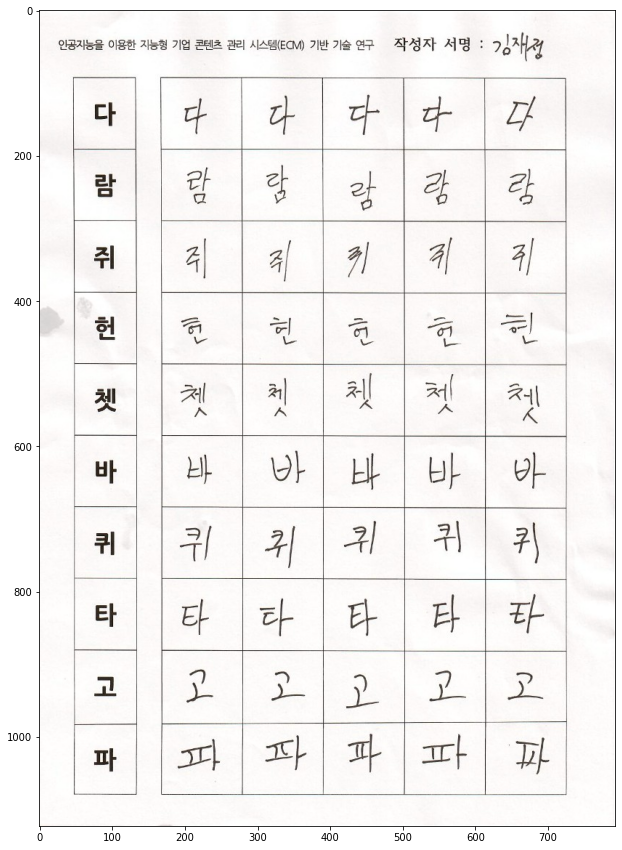

In [2]:
img_original = cv2.imread('testt.png')
plt.figure(figsize = (15, 15))
plt.imshow(img_original)

### 이미지 전처리 1(주변 잡음 제거)

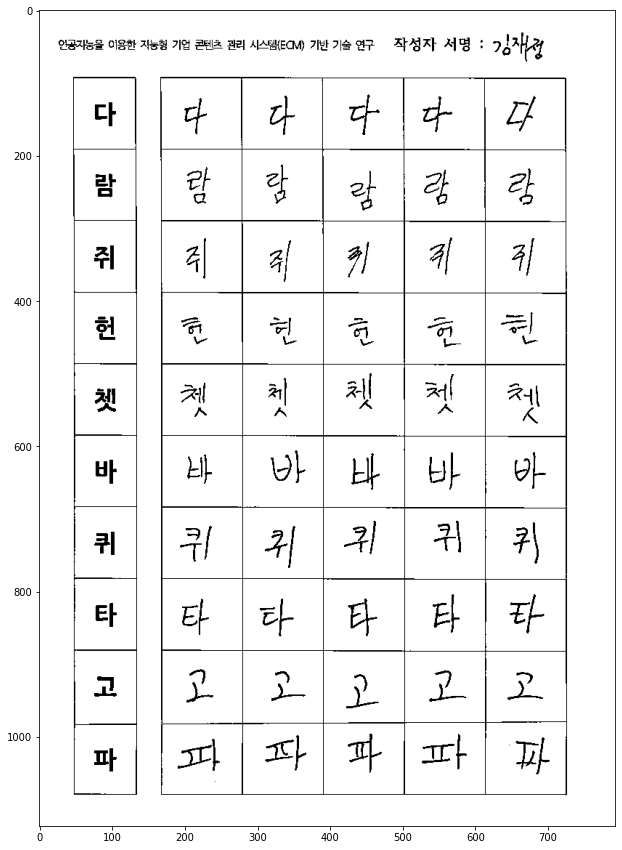

In [3]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
thresh2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)
plt.figure(figsize = (15,15))
plt.imshow(thresh2, cmap = 'gray')

### 경계 추출 1

In [4]:
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
imgcontour = cv2.drawContours(img_original, contours, -1, (255, 18, 255), 2)
img = cv2.imread("testt.png")

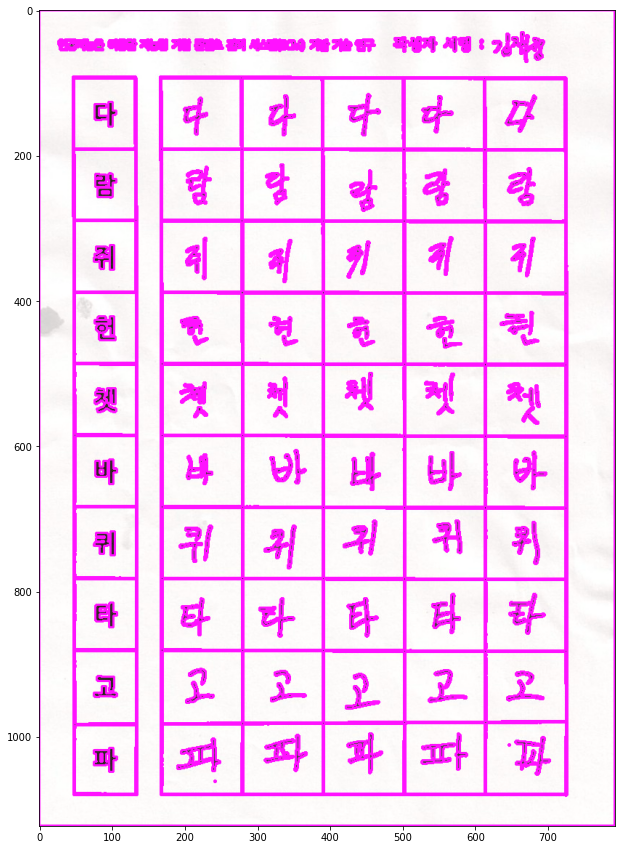

In [6]:
plt.figure(figsize = (15,15))
plt.imshow(imgcontour, cmap = 'gray')

### 글자 하나의 덩어리로 만들기

In [10]:
kernel = np.ones((10,10) ,np.uint8)
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)


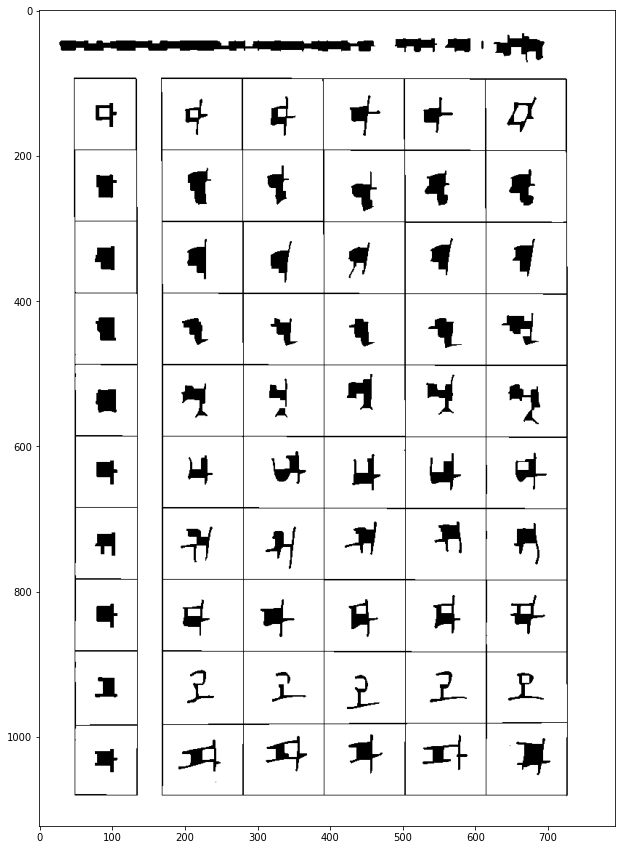

In [11]:
plt.figure(figsize = (15,15))
plt.imshow(opening, cmap = 'gray')

### 경계 추출 2

In [12]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

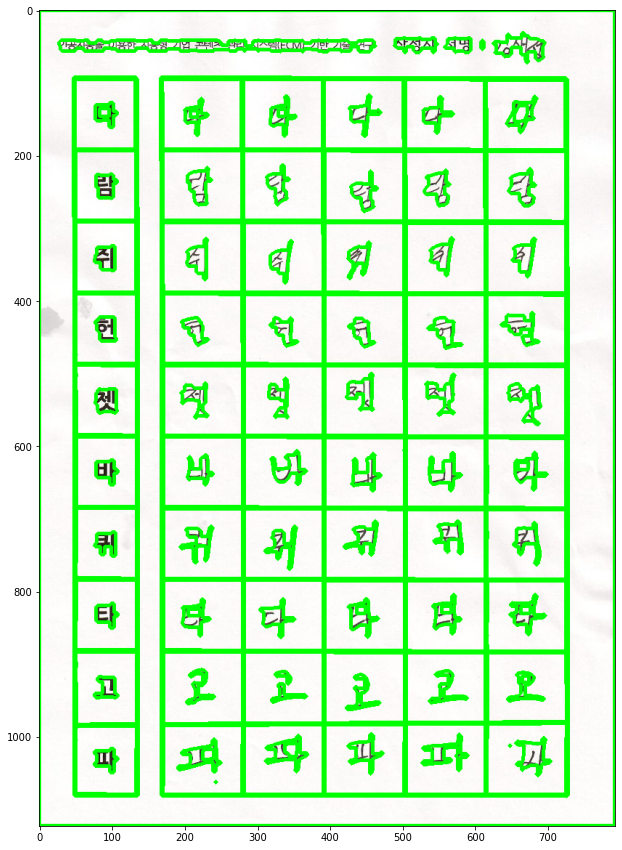

In [13]:
plt.figure(figsize = (15,15))
plt.imshow(img_contour, cmap = 'gray')

### 글자를 제외한 작은 잡음 제거

In [15]:
img_temp = cv2.imread("testt.png")
img_orig = cv2.imread("testt.png")

In [16]:
contour_pos = []

# 면적이 100 이하인 Contour 영역은 제거
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 437:
        contour_pos.append(pos)

# 면적 부분 오려내기
for pos in contour_pos:
    x, y, w, h = cv2.boundingRect(contours[pos])
    img_crop = img_temp[y:y + h, x:x + w]

### 추출된 영역 저장

In [17]:
for p in contour_pos:
    img_temp = cv2.imread("testt.png")
    img_orig = cv2.imread("testt.png")
    x, y, w, h = cv2.boundingRect(contours[p])

    cnt = contours[p]
    area = cv2.contourArea(cnt)

    area_box = w*h

    img_contour = cv2.drawContours(img_orig, contours, p, (0, 255, 0), 1)

    cnt = contours[p]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    # 글자 제외 배경 삭제
    #for i in range(y, y + h):
        #px_lst = img_contour[i]

        #for j in range(x, x + w):
         #   if (px_lst[j] == [0, 255, 0]).all():
          #      cv2.line(img_contour, (j, i), (cx, cy), (1, 2, 3), 2)

    #img_crop = img_contour[y:y + h, x:x + w]

    for i in range(y, y + h):
        px_lst = img_contour[i]

    img_save = img_temp[y:y + h, x:x + w]
    
    cv2.imwrite("./goo/img_save_%d.png" % p, img_save)
    